<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 12. <b>Объединение деревьев и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Преобразование категориальных значений</a></li>
        <li><a href="#2">Решающее дерево c категориальными признаками</a></li>
        <li><a href="#3">Bootstrap Aggregating - Bagging</a>
        <li><a href="#4">Случайный лес - Random Forest</a>
        <li><a href="#5">Extra Trees</a>
        <li><a href="#6">Сравнение методов</a>
        <li><a href="#7">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подлючение библиотек</b></p>

In [1]:
import time
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import stats

In [3]:
from sklearn import cross_validation

In [4]:
from sklearn.datasets import make_classification
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn import tree

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Преобразование категориальных значений</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Преобразование категориальных признаков</b></p>

In [7]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#преобразование из категориальных признаков в числовы производится при помощи данных функций ↑

<p><b><i>Один признак</i></b></p>

In [9]:
x = np.array(["red", "green", "blue", "red", "red", "green", "blue", "blue"])

<p><b><a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html">
DictVectorizer</a></b></p>
тут мы переводим значений в множество бинарных признаков
#перевод при помощи словарей

In [10]:
x_d = [{"color": el} for el in x]
x_d

[{'color': 'red'},
 {'color': 'green'},
 {'color': 'blue'},
 {'color': 'red'},
 {'color': 'red'},
 {'color': 'green'},
 {'color': 'blue'},
 {'color': 'blue'}]

In [66]:
dv = DictVectorizer(sparse=False)
x_dv = dv.fit_transform(x_d)
x_dv
#fit - создает модоель по обучающим данным, transform позволяет подставлять туда необходимые данные

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [68]:
#можно написать в 2 функции
x_dv = dv.fit(x_d)
x_dv = dv.transform(x_d)
x_dv

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [75]:
#пример использования трасформ
x_1 = np.array(["green", "blue"])
x_d_1 = [{"color": el} for el in x_1]
x_dv_1 = dv.transform(x_d_1)
x_dv_1

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

<p><b><a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">
OneHotEncoder</a></b></p>

In [12]:
x_dval = { value:indx for indx, value in enumerate(np.unique(x))}
x_dval

{'blue': 0, 'green': 1, 'red': 2}

In [13]:
x_num = np.array([x_dval[el] for el in x])
x_num

array([2, 1, 0, 2, 2, 1, 0, 0])

In [14]:
xx = x_num[:, np.newaxis]
xx

array([[2],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [0]])

In [74]:
enc = OneHotEncoder()
enc.fit_transform(xx).toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

<p><b><i>Два признака</i></b></p>

In [18]:
x1 = np.array(["red", "green", "blue", "red", "red", "green", "blue", "blue"])
x2 = np.array(["yes", "no", "yes", "yes", "no", "yes", "no", "yes"])

<p><b><a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html">
DictVectorizer</a></b></p>

In [19]:
# объединяем все в одну матрицу
x12 = list(zip(x1,x2))
x12

[('red', 'yes'),
 ('green', 'no'),
 ('blue', 'yes'),
 ('red', 'yes'),
 ('red', 'no'),
 ('green', 'yes'),
 ('blue', 'no'),
 ('blue', 'yes')]

In [20]:
# создаем список словарей
x12_d = [{"color": el[0], "mood": el[1]} for el in x12]
x12_d

[{'color': 'red', 'mood': 'yes'},
 {'color': 'green', 'mood': 'no'},
 {'color': 'blue', 'mood': 'yes'},
 {'color': 'red', 'mood': 'yes'},
 {'color': 'red', 'mood': 'no'},
 {'color': 'green', 'mood': 'yes'},
 {'color': 'blue', 'mood': 'no'},
 {'color': 'blue', 'mood': 'yes'}]

In [21]:
# первые три значени = цвет; 4, 5 это mood
dv = DictVectorizer(sparse=False)
x12_dv = dv.fit_transform(x12_d)
x12_dv

array([[ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.]])

<p><b><a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">
OneHotEncoder</a></b></p>

In [22]:
x12

[('red', 'yes'),
 ('green', 'no'),
 ('blue', 'yes'),
 ('red', 'yes'),
 ('red', 'no'),
 ('green', 'yes'),
 ('blue', 'no'),
 ('blue', 'yes')]

In [23]:
x1d = { value:indx for indx, value in enumerate(np.unique(x1))}
x2d = { value:indx for indx, value in enumerate(np.unique(x2))}

x12_dval = np.array([(x1d[el[0]], x2d[el[1]]) for el in x12])
x12_dval

array([[2, 1],
       [1, 0],
       [0, 1],
       [2, 1],
       [2, 0],
       [1, 1],
       [0, 0],
       [0, 1]])

In [76]:
enc = OneHotEncoder()
enc.fit_transform(x12_dval).toarray()

array([[ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.]])

<p><b>Преобразование категориальных значений принадлежности классу</b></p>

In [25]:
y = ["full", "half", "empty", "full", "full", "half", "empty"]
# теперь представим, что каждое значение представленно своим категориальным признаком

<p><b><a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">
LabelEncoder</a></b></p>

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
le = le.fit(y)

In [29]:
le.classes_
#выделям пресутствующие классы

array(['empty', 'full', 'half'], 
      dtype='<U5')

In [30]:
le.transform(y)
#каждому классу будет назначен свой номер

array([1, 2, 0, 1, 1, 2, 0], dtype=int64)

In [31]:
le.transform(["empty", "half", "half", "full"])

array([0, 2, 2, 1], dtype=int64)

In [32]:
le.inverse_transform([0, 2, 2, 1])
# так мы можем возвращать обратно классы

array(['empty', 'half', 'half', 'full'], 
      dtype='<U5')

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Решающее дерево c категориальными признаками</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [33]:
from sklearn.feature_extraction import DictVectorizer

<p><b>Исходные данные</b></p>

In [34]:
df = pnd.read_csv("vertebrate.csv")
df.dropna(inplace=True)
df.head(5)

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian


<p><b>Предобработка</b></p>

<p><b><i>Признаки</i></b></p>

In [35]:
X = df[df.columns[1:8]]
X.head(5)

,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,warm-blooded,hair,yes,no,no,yes,no
1,cold-blooded,scales,no,no,no,no,yes
2,cold-blooded,scales,no,yes,no,no,no
3,warm-blooded,hair,yes,yes,no,no,no
4,cold-blooded,none,no,semi,no,yes,yes


In [36]:
X_d = X.to_dict(orient="record")
X_d[:2]
# преобразование в словарь orient - каким способом получать данные (record  - создадим словарь для каждой записи,
# по умолчанию для каждого столбца свой словарь)

[{'Aerial Creature': 'no',
  'Aquatic Creature': 'no',
  'Body Temperature': 'warm-blooded',
  'Gives Birth': 'yes',
  'Has Legs': 'yes',
  'Hibernates': 'no',
  'Skin Cover': 'hair'},
 {'Aerial Creature': 'no',
  'Aquatic Creature': 'no',
  'Body Temperature': 'cold-blooded',
  'Gives Birth': 'no',
  'Has Legs': 'no',
  'Hibernates': 'yes',
  'Skin Cover': 'scales'}]

In [37]:
dv = DictVectorizer(sparse=False)
X_dv = dv.fit_transform(X_d)
X_dv[:2]

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.]])

<p><b><i>Классы</i></b></p>

In [38]:
Y = df["Class Label"]
Y
# переводим классы в числовые значения

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
Name: Class Label, dtype: object

In [39]:
le = LabelEncoder()

In [40]:
Y_le = le.fit_transform(Y)
Y_le

array([3, 4, 2, 3, 0, 4, 3, 1, 3, 2, 4, 1, 3, 2, 0], dtype=int64)

In [41]:
le.inverse_transform([3, 4, 2, 3, 0, 4, 3, 1, 3, 2, 4, 1, 3, 2, 0])

array(['mammal', 'reptile', 'fish', 'mammal', 'amphibian', 'reptile',
       'mammal', 'bird', 'mammal', 'fish', 'reptile', 'bird', 'mammal',
       'fish', 'amphibian'], dtype=object)

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [42]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X_dv, Y_le, test_size=0, random_state=0)
#простой пример при тестовом = 0

<p><b>Обучение</b></p>

In [43]:
decTree = tree.DecisionTreeClassifier(criterion="entropy")

In [44]:
decTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
score = decTree.score(x_train, y_train)
score

1.0

<p><b>Простая проверка</b></p>

In [77]:
x_test_arr = ["cold-blooded", "scales", "no", "no", "no", "no", "yes"]
X_test_d = {df.columns[1:8][i]:x_test_arr[i] for i in range(len(x_test_arr))}
X_test_d
# вводим призначки для какого-либло животного (python в нашем случае)

{'Aerial Creature': 'no',
 'Aquatic Creature': 'no',
 'Body Temperature': 'cold-blooded',
 'Gives Birth': 'no',
 'Has Legs': 'no',
 'Hibernates': 'yes',
 'Skin Cover': 'scales'}

In [47]:
#x_test_arr = ["cold-blooded", "scales", "no", "no", "no", "no", "yes"]
#x_zip = list(zip(df.columns[1:8], x_test_arr))
#X_test_d = {el[0]:el[1] for el in x_zip}
#X_test_d
#получения словаря другим способом

In [48]:
X_test = dv.transform(X_test_d)
X_test
# преревели в тестовые значения

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.]])

In [49]:
pr_value = decTree.predict(X_test)
pr_value
# получаем значение для нашего теста

array([4], dtype=int64)

In [50]:
le.inverse_transform(pr_value)
# ура, угадали

array(['reptile'], dtype=object)

<p><b>Пример 2</b></p>

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Bootstrap Aggregating - Bagging</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Обычное дерево - классификация</b></p>

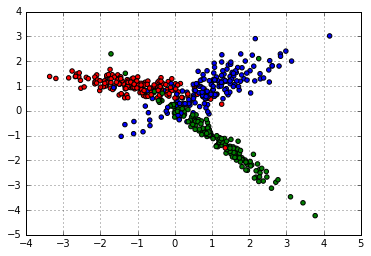

Time = 0.0
Test Score =  0.8


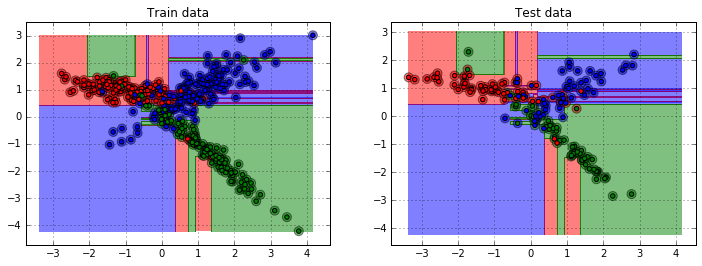

In [51]:
# комбинации деревьев

#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
decTree = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
decTree.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_dt_cl = decTree.score(x_test, y_test)
print("Test Score = ", score_dt_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = decTree.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=decTree.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Bootstrap Aggregating - классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">BaggingClassifier</a>

In [52]:
from sklearn.ensemble import BaggingClassifier

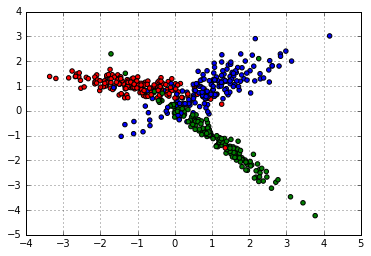

Time = 0.015630245208740234
Test Score =  0.833333333333


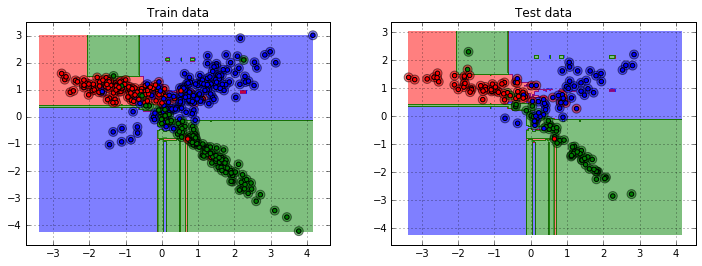

In [53]:
#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
decTree = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

#сам классификатор (параметры описаны в ссылке выше, можно почитать)!
bagCls = BaggingClassifier(base_estimator=decTree, n_estimators=10, max_samples=1.0, max_features=1.0, 
                           bootstrap=True, bootstrap_features=False, oob_score=False, random_state=0)
bagCls.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_bc_cl = bagCls.score(x_test, y_test)
print("Test Score = ", score_bc_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = bagCls.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=bagCls.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=bagCls.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Обычное дерево - регрессия</b></p>

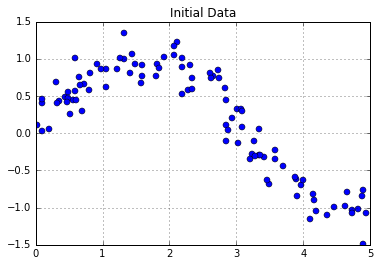

R^2 = 0.810088961078


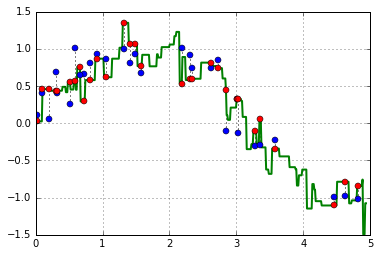

In [78]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
decTreeReg = tree.DecisionTreeRegressor(criterion="mse", max_depth=10, random_state=0)
decTreeReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_dt_reg = decTreeReg.score(x_test, y_test)
print("R^2 =", score_dt_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, decTreeReg.predict(xx), c="g", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTreeReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTreeReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<p><b>Bootstrap Aggregating - регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html">BaggingRegressor</a>

In [79]:
from sklearn.ensemble import BaggingRegressor

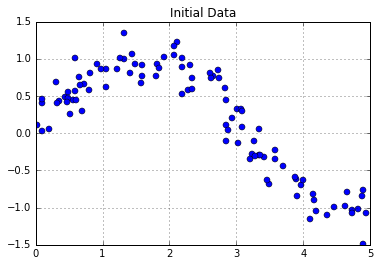

R^2 = 0.856042714094


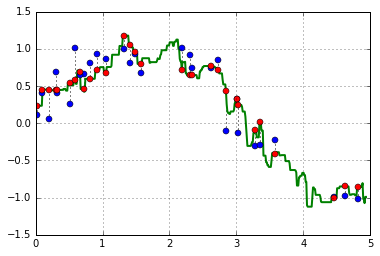

In [81]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
decTreeReg = tree.DecisionTreeRegressor(criterion="mse", max_depth=10, random_state=0)
bagReg = BaggingRegressor(base_estimator=decTreeReg, n_estimators=10, max_samples=1.0, max_features=1.0, 
                           bootstrap=True, bootstrap_features=False, oob_score=False, random_state=0)
bagReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_dt_reg = bagReg.score(x_test, y_test)
print("R^2 =", score_dt_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, bagReg.predict(xx), c="g", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=bagReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, bagReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Случайный лес - Random Forest</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Random Forest - классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>

In [57]:
from sklearn.ensemble import RandomForestClassifier

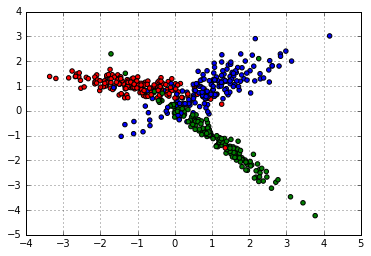

Time = 0.015625715255737305
Test Score =  0.84


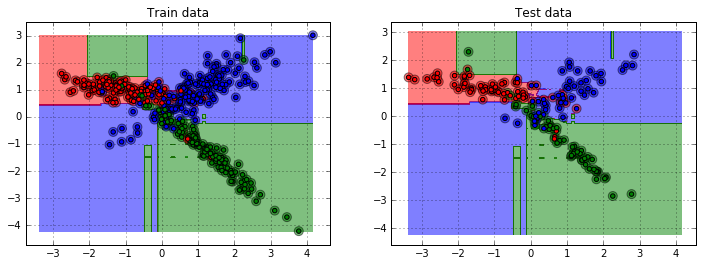

In [58]:
#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
randForest = RandomForestClassifier(n_estimators=10, criterion="entropy", bootstrap=True, 
                                    oob_score=False, random_state=0)
randForest.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_rf_cl = randForest.score(x_test, y_test)
print("Test Score = ", score_rf_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = randForest.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=randForest.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=randForest.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Random Forest - регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">RandomForestRegressor</a>

In [59]:
from sklearn.ensemble import RandomForestRegressor

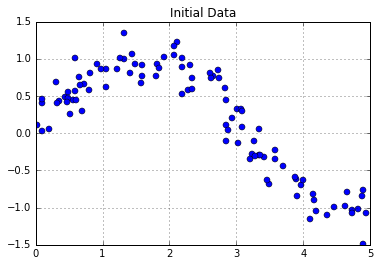

R^2 = 0.856078359518


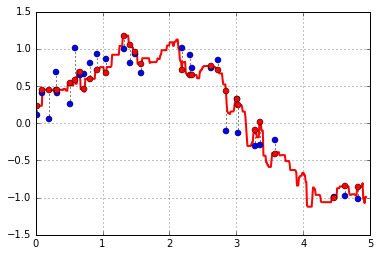

In [60]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
randForestReg = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse", bootstrap=True, 
                                    oob_score=False, random_state=0)
randForestReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_rf_reg = randForestReg.score(x_test, y_test)
print("R^2 =", score_rf_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, randForestReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=randForestReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, randForestReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="5"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">5. Extra Trees</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Extra Trees - классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">ExtraTreesClassifier</a>

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

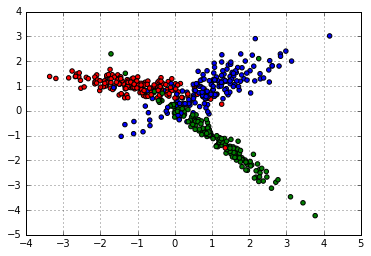

In [ ]:
#Исходные данные
# тут добавляется еще и случайность в выборе признаков
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
randForest = ExtraTreesClassifier(n_estimators=10000, criterion="entropy", bootstrap=True, 
                                    oob_score=False, random_state=0)
randForest.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_rf_cl = randForest.score(x_test, y_test)
print("Test Score = ", score_rf_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = randForest.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=randForest.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=randForest.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Extra Trees - регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html">ExtraTreesRegressor</a>

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

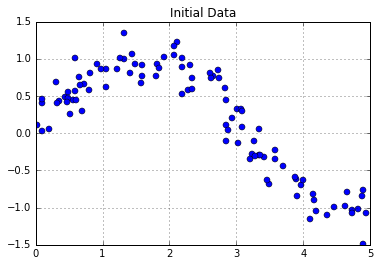

R^2 = 0.866929303879


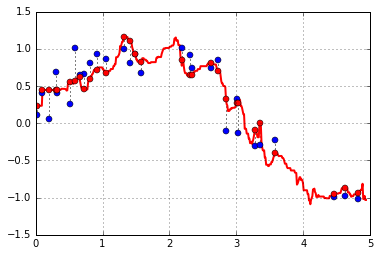

In [86]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
#сам классификатор (параметры описаны в ссылке выше, можно почитать)!
extTrReg = ExtraTreesRegressor(n_estimators=10, max_depth=10, criterion="mse", bootstrap=True, 
                                    oob_score=False, random_state=0)
extTrReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_et_reg = extTrReg.score(x_test, y_test)
print("R^2 =", score_et_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, extTrReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=extTrReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, extTrReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="6"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">6. Сравнение методов</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a name="7"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">7. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>